In [88]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet18  # Example model, assuming you want a common model as in keras.applications
from torch import nn, optim

# If you specifically need a sequential model as in keras.models.Sequential:
model = nn.Sequential(
    # Define your model layers here. Example:
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2)
    # Add more layers as needed...
)


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import pathlib
dataset_url = "/content/drive/MyDrive/DATA 255/Fruits_Vegetables/Fruits_Vegetables/train/apple"
data_dir = pathlib.Path(dataset_url)


Number of images in the 'apple' : 101


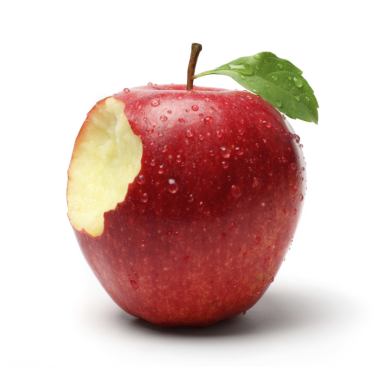

In [91]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define the directory path where your dataset is stored
data_dir = '/content/drive/MyDrive/DATA 255/Fruits_Vegetables/Fruits_Vegetables/train'

# Define the path to the 'apple' folder
apple_dir = os.path.join(data_dir, 'apple')

# Count the number of images in the 'apple' folder
apple_image_count = len(os.listdir(apple_dir))

print(f"Number of images in the 'apple' : {apple_image_count}")

# Define the path to the first image file in the 'apple' folder
apple_image_path = os.path.join(apple_dir, 'Image_1.jpg')

# Open and display the first image in the 'apple' folder
try:
    image = Image.open(apple_image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("Image not found.")


Number of images in the 'banana': 102


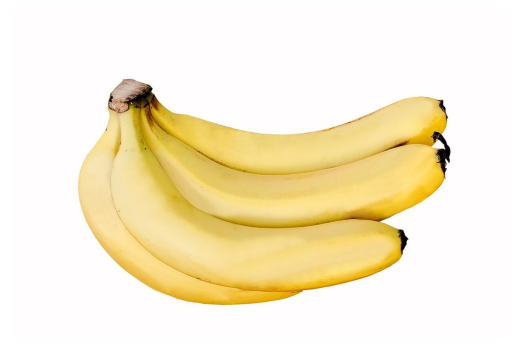

In [92]:

# Define the path to the 'banana' folder
banana_dir = os.path.join(data_dir, 'banana')

# Count the number of images in the 'banana' folder
banana_image_count = len(os.listdir(banana_dir))

print(f"Number of images in the 'banana': {banana_image_count}")

# Define the path to the first image file in the 'banana' folder
banana_image_path = os.path.join(banana_dir, 'Image_1.jpg')

# Open and display the first image in the 'banana' folder
try:
    image = Image.open(banana_image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("Image not found.")

Number of images in the 'kiwi' folder: 102


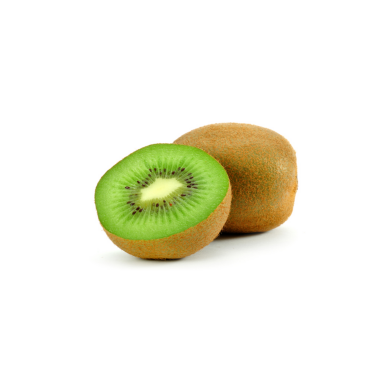

In [93]:

# Define the path to the 'kiwi' folder
kiwi_dir = os.path.join(data_dir, 'kiwi')

# Count the number of images in the 'kiwi' folder
kiwi_image_count = len(os.listdir(kiwi_dir))

print(f"Number of images in the 'kiwi' folder: {kiwi_image_count}")

# Define the path to the first image file in the 'kiwi' folder
kiwi_image_path = os.path.join(kiwi_dir, 'Image_1.jpg')

# Open and display the first image in the 'kiwi' folder
try:
    image = Image.open(kiwi_image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("Image not found.")

In [94]:
batch_size = 32
img_height = 180
img_width = 180

from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Example normalization values
])


In [95]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch

# Define transformations
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
data_dir = '/content/drive/MyDrive/DATA 255/Fruits_Vegetables/Fruits_Vegetables/train'
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset
val_split = 0.2
total_size = len(full_dataset)
val_size = int(total_size * val_split)
train_size = total_size - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(123))

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [96]:
# Assuming 'full_dataset' is your ImageFolder instance
class_names = full_dataset.classes
print(class_names)


['apple', 'banana', 'kiwi']


In [97]:
from torch.utils.data import DataLoader

# Set the number of subprocesses to use for data loading.
# The optimal value depends on your hardware, dataset, and the complexity of transformations.
num_workers = 2  # Adjust based on your system's capability

# Set the size of the shuffle buffer. In PyTorch, this is not a buffer size, but rather
# whether to shuffle the dataset at every epoch.
shuffle_buffer_size = True  # For the training dataset

# For the training DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=shuffle_buffer_size, num_workers=num_workers, pin_memory=True)

# For the validation DataLoader, typically you don't need to shuffle the validation data.
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=num_workers, pin_memory=True)


Visualizing the Transformed Data

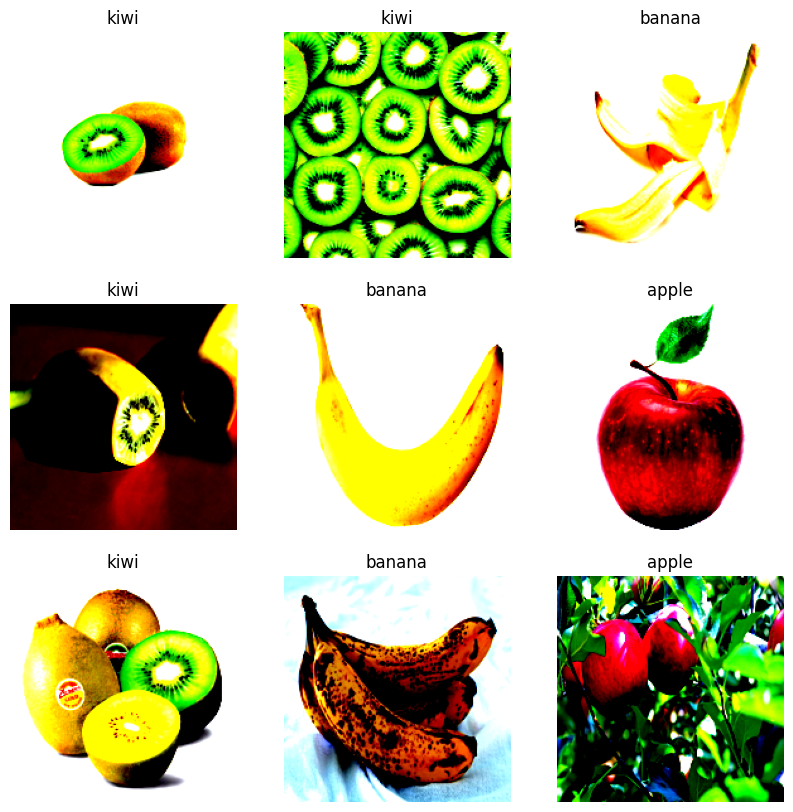

In [98]:
# Assuming 'train_loader' is your PyTorch DataLoader for the training dataset
# and 'class_names' is a list or array containing the class names

# Create a figure to display the images
plt.figure(figsize=(10, 10))

# Get the first batch of images and labels from the DataLoader
images, labels = next(iter(train_loader))

# Loop to plot the first 9 images and their labels
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # PyTorch images: [C, H, W] format and range [0, 1]
    # Convert them to NumPy format: [H, W, C] for matplotlib and rescale to [0, 255]
    img = images[i].numpy().transpose((1, 2, 0))
    # If normalization other than [0,1] was used, you might need to adjust scaling here
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()


In [99]:
for image_batch, labels_batch in train_loader:
    print(image_batch.shape)  # Prints the shape of the batch of images
    print(labels_batch.shape)  # Prints the shape of the batch of labels
    break  # Exits the loop after the first batch


torch.Size([32, 3, 180, 180])
torch.Size([32])


**Base CNN model**

In [100]:
import torch
from torch import nn

class CNNModel(nn.Module):
    def __init__(self, num_classes=3):
        super(CNNModel, self).__init__()
        # Define the layers of the model
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Corrected from MaxPooling2d to MaxPool2d
        self.flatten = nn.Flatten()
        # The calculation below assumes img_height and img_width are defined and represent the size of the input images
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Before creating the model instance, ensure img_height and img_width are defined.
model = CNNModel(num_classes=3)



In [101]:
import torch.optim as optim
import torch.nn as nn

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # lr is the learning rate


In [102]:
import torch
torch.cuda.is_available()


True

In [103]:
from torchsummary import summary
model.cuda()
# Assuming your model is named 'model' and is already defined
# Also, you need to specify the input size that your model expects
summary(model, input_size=(3, img_height, img_width))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 180, 180]             448
              ReLU-2         [-1, 16, 180, 180]               0
         MaxPool2d-3           [-1, 16, 90, 90]               0
            Conv2d-4           [-1, 32, 90, 90]           4,640
              ReLU-5           [-1, 32, 90, 90]               0
         MaxPool2d-6           [-1, 32, 45, 45]               0
            Conv2d-7           [-1, 64, 45, 45]          18,496
              ReLU-8           [-1, 64, 45, 45]               0
         MaxPool2d-9           [-1, 64, 22, 22]               0
          Flatten-10                [-1, 30976]               0
           Linear-11                  [-1, 128]       3,965,056
             ReLU-12                  [-1, 128]               0
           Linear-13                    [-1, 3]             387
Total params: 3,989,027
Trainable param

In [104]:
def train_one_epoch(epoch_index, train_loader, model, loss_fn, optimizer, device):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct_predictions / total_predictions
    print(f"Epoch [{epoch_index+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

def validate(model, val_loader, loss_fn, device):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():  # Inference mode, gradients not needed
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = correct_predictions / total_predictions
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# Device configuration - use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training the model
epochs = 10
for epoch in range(epochs):
    train_one_epoch(epoch, train_loader, model, loss_fn, optimizer, device)
    validate(model, val_loader, loss_fn, device)


Epoch [1/10], Loss: 1.1983, Accuracy: 0.3320
Validation Loss: 1.0653, Validation Accuracy: 0.4262
Epoch [2/10], Loss: 0.8585, Accuracy: 0.6639
Validation Loss: 0.8771, Validation Accuracy: 0.5574
Epoch [3/10], Loss: 0.5519, Accuracy: 0.7951
Validation Loss: 0.6707, Validation Accuracy: 0.7541
Epoch [4/10], Loss: 0.4041, Accuracy: 0.8402
Validation Loss: 0.5498, Validation Accuracy: 0.8197
Epoch [5/10], Loss: 0.2719, Accuracy: 0.9221
Validation Loss: 0.5310, Validation Accuracy: 0.7705
Epoch [6/10], Loss: 0.1690, Accuracy: 0.9590
Validation Loss: 0.4714, Validation Accuracy: 0.8033
Epoch [7/10], Loss: 0.0901, Accuracy: 0.9754
Validation Loss: 0.3688, Validation Accuracy: 0.8525
Epoch [8/10], Loss: 0.0523, Accuracy: 0.9836
Validation Loss: 0.4368, Validation Accuracy: 0.8361
Epoch [9/10], Loss: 0.0250, Accuracy: 0.9959
Validation Loss: 0.4152, Validation Accuracy: 0.8525
Epoch [10/10], Loss: 0.0119, Accuracy: 0.9959
Validation Loss: 0.4721, Validation Accuracy: 0.8033


**DATA augmentation**

In [105]:
from torchvision import transforms

# Define a data augmentation pipeline
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # Randomly flip the images on the horizontal axis
    transforms.RandomRotation(0.1),     # Randomly rotate the images by 10% of 360 degrees
    transforms.RandomResizedCrop((img_height, img_width), scale=(0.9, 1.1), ratio=(0.9, 1.1))  # Random zoom/crop
    # If you need more fine-grained control over zoom, you might need a custom transform
])


In [106]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Assuming 'data_dir' is the path to your dataset
train_dataset = ImageFolder(
    root=data_dir,
    transform=transforms.Compose([
        data_augmentation,
        transforms.ToTensor(),

        # Include any additional transforms here
    ])
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)


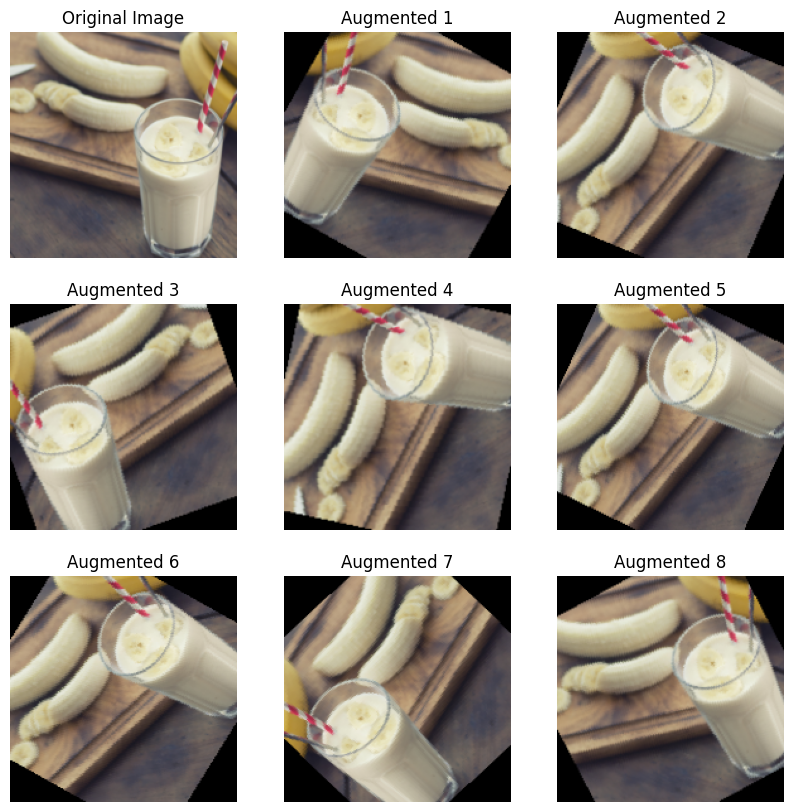

In [107]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image

# Fetch one batch of images
dataiter = iter(train_loader)
images, _ = next(dataiter)

# Select the first image from the batch
original_image = images[0]

# Define the data_augmentation if not already defined
data_augmentation = T.Compose([
    T.RandomHorizontalFlip(),
    T.RandomRotation(100),
    T.RandomResizedCrop((img_height, img_width), scale=(0.9, 1.1), ratio=(0.9, 1.1)),
    T.ToTensor()  # Assuming the original transform pipeline includes ToTensor
])

# Convert the original image to PIL for display if needed
original_image_pil = T.ToPILImage()(original_image)

# Apply the data_augmentation to the same image multiple times
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    if i == 0:
        # Display the original image first
        plt.imshow(original_image_pil)
        plt.title("Original Image")
    else:
        # Apply augmentation and display the augmented images
        augmented_image = data_augmentation(original_image_pil)
        plt.imshow(T.ToPILImage()(augmented_image))
        plt.title(f"Augmented {i}")
    plt.axis("off")
plt.show()


In [108]:
from torchvision import datasets, transforms

# Define transforms for training dataset
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop((img_height, img_width), scale=(0.9, 1.1), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply transforms to your training dataset
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/DATA 255/Fruits_Vegetables/Fruits_Vegetables/train', transform=train_transforms)


CNN model after data augmentation and dropout

In [109]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(64 * (img_height // 8) * (img_width // 8), 128),
            nn.ReLU(),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the output for the classifier
        x = self.classifier(x)
        return x


In [110]:
import torch

def train(model, train_loader, loss_fn, optimizer, device):
    model.train()  # Set the model to training mode
    total_loss, correct, total = 0, 0, 0

    for batch in train_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total
    return avg_loss, accuracy

def validate(model, val_loader, loss_fn, device):
    model.eval()  # Set the model to evaluation mode
    total_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for batch in val_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Assuming you have defined 'epochs'
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, loss_fn, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, loss_fn, device)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')


Epoch 1/10, Train Loss: 0.8510, Train Acc: 0.5770, Val Loss: 1.4879, Val Acc: 0.6885
Epoch 2/10, Train Loss: 0.5380, Train Acc: 0.8066, Val Loss: 1.2287, Val Acc: 0.7377
Epoch 3/10, Train Loss: 0.4552, Train Acc: 0.8197, Val Loss: 2.5651, Val Acc: 0.5574
Epoch 4/10, Train Loss: 0.2887, Train Acc: 0.8754, Val Loss: 3.3016, Val Acc: 0.5246
Epoch 5/10, Train Loss: 0.2096, Train Acc: 0.9377, Val Loss: 5.0722, Val Acc: 0.4590
Epoch 6/10, Train Loss: 0.1555, Train Acc: 0.9475, Val Loss: 2.9508, Val Acc: 0.6557
Epoch 7/10, Train Loss: 0.1204, Train Acc: 0.9607, Val Loss: 5.1696, Val Acc: 0.5574
Epoch 8/10, Train Loss: 0.0687, Train Acc: 0.9803, Val Loss: 6.0923, Val Acc: 0.5410
Epoch 9/10, Train Loss: 0.0430, Train Acc: 0.9934, Val Loss: 5.4603, Val Acc: 0.5410
Epoch 10/10, Train Loss: 0.0401, Train Acc: 0.9902, Val Loss: 4.6243, Val Acc: 0.5738


We can see that dropout and data augmentation slightly improved accuracy

# **Inference on Model**

In [111]:
# Load and preprocess the unseen image
image_path = '/content/drive/MyDrive/DATA 255/Fruits_Vegetables/Fruits_Vegetables/test/apple/Image_1.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [112]:
import torch
from PIL import Image
from torchvision import transforms

batch_size = 32
img_height = 180
img_width = 180

# Load and preprocess the unseen image
image_path = '/content/drive/MyDrive/DATA 255/Fruits_Vegetables/Fruits_Vegetables/train/apple/Image_24.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.CenterCrop((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0).cuda()  # Add a batch dimension and move to GPU

# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
# class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(output, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image likely belongs to {predicted_class_name}")



This image likely belongs to apple


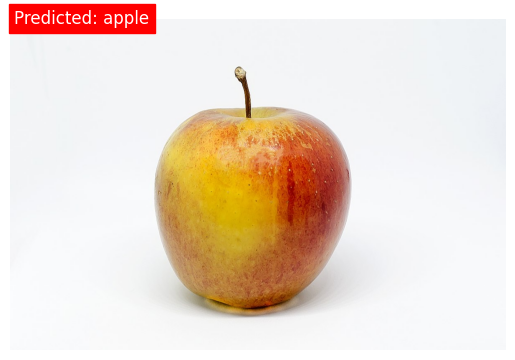

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

### **Googlenet**

In [114]:
import torchvision.models as models

googlenet = models.googlenet(pretrained=True)
batch_size = 32  # Choose your desired batch size
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


In [115]:
# Freeze all layers except the final classification layer
for name, param in googlenet.named_parameters():
    if "fc" not in name:  # Freeze all layers except the final classification layer
        param.requires_grad = False


In [116]:
# Modify the final classification layer
num_classes = 3
print(num_classes)
num_ftrs = googlenet.fc.in_features
googlenet.fc = nn.Linear(num_ftrs, num_classes)

3


In [117]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
googlenet = googlenet.to(device)

In [118]:

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(googlenet.parameters(), lr=0.001)  # Use all parameters

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    googlenet.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = googlenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    epoch_accuracy = correct_predictions / total_samples
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

Epoch 1/10, Loss: 0.9284, Accuracy: 0.6361
Epoch 2/10, Loss: 0.5936, Accuracy: 0.8721
Epoch 3/10, Loss: 0.4262, Accuracy: 0.9443
Epoch 4/10, Loss: 0.3333, Accuracy: 0.9377
Epoch 5/10, Loss: 0.2809, Accuracy: 0.9541
Epoch 6/10, Loss: 0.2342, Accuracy: 0.9607
Epoch 7/10, Loss: 0.1830, Accuracy: 0.9803
Epoch 8/10, Loss: 0.1942, Accuracy: 0.9770
Epoch 9/10, Loss: 0.1780, Accuracy: 0.9738
Epoch 10/10, Loss: 0.1646, Accuracy: 0.9672


In [125]:
import torch
from PIL import Image
from torchvision import transforms

batch_size = 32
img_height = 180
img_width = 180

# Load and preprocess the unseen image
image_path = '/content/drive/MyDrive/DATA 255/Fruits_Vegetables/Fruits_Vegetables/test/apple/Image_8.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.CenterCrop((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0).cuda()

# Perform inference
with torch.no_grad():
    output = googlenet(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name

predicted_class_name = class_names[predicted_class.item()]
print(f"This image likely belongs to {predicted_class_name}")



This image likely belongs to apple


**Googlenet show better performance than the custom CNN model**